# Análise exploratória de dados de Gorjetas

Este caderno é dedicado à análise exploratória de dados (EDA), com o objetivo de entender a estrutura dos dados e obter insights iniciais. Ele está organizado em três etapas principais:

* 1. **Descrição dos Dados**:
Nesta etapa, os dados são analisados quanto à sua estrutura, verificando a presença de valores faltantes, a distribuição das variáveis, e a criação de um dicionário de dados para facilitar a compreensão das informações.

* 2. **Perguntas e Hipóteses**:
Aqui, são formuladas perguntas iniciais sobre os dados, seguidas de hipóteses baseadas nessas perguntas. Essas hipóteses serão verificadas na etapa final para avaliar sua validade.

* 3. **Geração de Insights**:
Diversos gráficos e análises visuais são criados para responder às perguntas formuladas e testar as hipóteses. Com isso, buscamos confirmar ou refutar as hipóteses, gerando insights relevantes para o contexto do projeto.

## 1. Descrição dos dados

* Bibliotecas:

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
dados = pd.read_csv('https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/tips.csv')

In [7]:
dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* Verificando estrutura dos dados:

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [9]:
dados.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


* Verificando valores nulos:

In [10]:
valores_nulos = dados.isnull().values.any()

if valores_nulos:
    print("Há valores nulos na tabela.")
else:
    print("Não há valores nulos na tabela.")

Não há valores nulos na tabela.


In [11]:
print(f'Verificando valores faltantes : \n\n{dados.isna().sum()}')

Verificando valores faltantes : 

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


Não há valores faltantes nos dados

In [12]:
dados.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [13]:
dados['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
dados['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
dados['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
dados['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [17]:
dados['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

* Verificando dados discrepantes:

In [18]:
dados.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
# Cálculo do IQR
Q1 = dados['total_bill'].quantile(0.25)
Q3 = dados['total_bill'].quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
# Filtrar dados sem outliers
df_clean = dados[(dados['total_bill'] >= lower_bound) & (dados['total_bill'] <= upper_bound)]

print(df_clean)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[235 rows x 7 columns]


* Dicionário de dados:

In [22]:
dados_dictionary = pd.DataFrame([
    {
        'Dataset': 'tips.csv',
        'linhas': 244,
        'colunas': 7,
        'nome_colunas': ['total_bill','tip','sex','smoker','day','time','size'],
        'valores_faltantes_total': 0,
       
    },
    {
        'variavel': 'total_bill',
        'descricao': 'Representa o valor total da conta em dólares',
        'tipo': 'quantitativa',
        'subtipo': 'contínua',
        'dtype': 'float64',
        'valores_faltantes': 0,
        'valores_unicos:': 229,
    },
    {
        'variavel': 'tip',
        'descricao': 'Representa o valor da gorjeta em dólares',
        'tipo': 'quantitativa',
        'subtipo': 'contínua',
        'dtype': 'float64',
        'valores_faltantes': 0,
        'valores_unicos:': 123,
    },
    {
        'variavel': 'sex',
        'descricao': 'Indica o sexo da pessoa (Masculino ou Feminino)',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
        'dtype': 'object',
        'valores_faltantes': 0,
        'valores_unicos:': 2,
        'lista_valores_unicos': ['Female', 'Male'],
    },
    {
        'variavel': 'smoker',
        'descricao': 'Indica se a pessoa é fumante ou não',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
        'dtype': 'object',
        'valores_faltantes': 0,
        'valores_unicos:': 2,
        'lista_valores_unicos': ['No', 'Yes'],
    },
    {
        'variavel': 'day',
        'descricao': 'Indica o dia da semana em que a refeição ocorreu',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
        'dtype': 'object',
        'valores_faltantes': 0,
        'valores_unicos:': 4,
        'lista_valores_unicos': ['Sun', 'Sat', 'Thur', 'Fri'],
    },
    {
        'variavel': 'time',
        'descricao': 'Indica se a refeição ocorreu no almoço ou jantar',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
        'dtype': 'object',
        'valores_faltantes': 0,
        'valores_unicos:': 2,
        'lista_valores_unicos': ['Dinner', 'Lunch'],
    },
    {
        'variavel': 'size',
        'descricao': 'Indica o número de pessoas no grupo',
        'tipo': 'quantitativa',
        'subtipo': 'discreta',
        'dtype': 'int64',
        'valores_faltantes': 0,
        'valores_unicos:': 6,
        'lista_valores_unicos': [2, 3, 4, 1, 6, 5],
    }
])


## 2. Perguntas de partida e hipóteses

### PERGUNTAS DE PARTIDA

* Existe uma relação entre o valor da conta (total_bill) e o valor da gorjeta (tip)?
* Pessoas de diferentes sexos (sex) tendem a dar gorjetas de valores diferentes?
* O fato de a pessoa ser fumante (smoker) influencia no valor da gorjeta?
* O valor da gorjeta varia de acordo com o dia da semana (day)?
* Há diferença no valor das gorjetas em refeições feitas no almoço ou jantar (time)?
* O tamanho do grupo (size) influencia o valor total da conta e/ou da gorjeta?

### HIPÓTESES

* Hipótese 1: Existe uma correlação positiva entre o valor total da conta (total_bill) e o valor da gorjeta (tip). Ou seja, quanto maior o valor da conta, maior tende a ser a gorjeta.
* Hipótese 2: Clientes do sexo feminino (sex) tendem a dar gorjetas de valores diferentes em comparação aos clientes do sexo masculino.
* Hipótese 3: Clientes que são fumantes (smoker) deixam gorjetas menores em comparação aos não-fumantes.
* Hipótese 4: O valor da gorjeta é maior nos finais de semana (sábado e domingo) do que durante os dias da semana.
* Hipótese 5: O período da refeição (time) influencia o valor da gorjeta, sendo maior no jantar do que no almoço.
* Hipótese 6: Grupos maiores (size) resultam em contas maiores (total_bill), mas isso não significa necessariamente uma gorjeta proporcionalmente maior

### RESPONDENDO AS PERGUNTAS

* **Existe uma relação entre o valor da conta (total_bill) e o valor da gorjeta (tip)?**

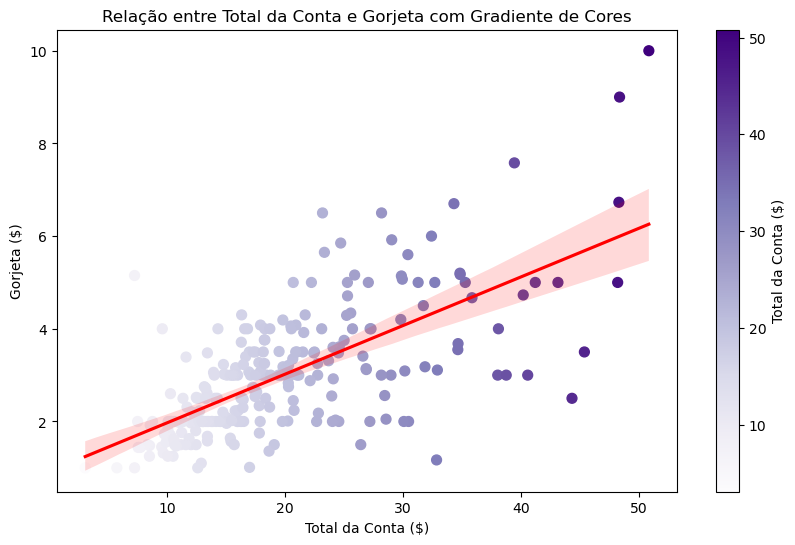

In [43]:
# Paleta de cores (Purples)
palette = sns.color_palette("Purples", as_cmap=True)

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersão com gradiente de cores
scatter = plt.scatter(
    x=dados['total_bill'], 
    y=dados['tip'], 
    c=dados['total_bill'],  # Valores para o gradiente
    cmap=palette,           # Paleta
    s=50                    # Tamanho dos pontos
)

# Adicionando a linha de regressão
sns.regplot(
    x='total_bill', 
    y='tip', 
    data=dados, 
    scatter=False,          # Desativa os pontos do regplot
    line_kws={'color': 'red'}
)

# Adicionando uma barra de cores
plt.colorbar(scatter, label='Total da Conta ($)')

# Configurações adicionais
plt.title('Relação entre Total da Conta e Gorjeta com Gradiente de Cores')
plt.xlabel('Total da Conta ($)')
plt.ylabel('Gorjeta ($)')

plt.show()


Observa-se que os valores de conta e gorjeta estão bem distribuídos, mas com a inclinação da reta, percebe-se que os maiores valores de gorjeta estão onde há maior valor da conta, entre 30 e 50, no entanto, há uma concentração maior de pessoas nos valores abaixo disso, o que pode resultar em uma soma maior de gorjetas recebidas.

* **Pessoas de diferentes sexos (sex) tendem a dar gorjetas de valores diferentes?**

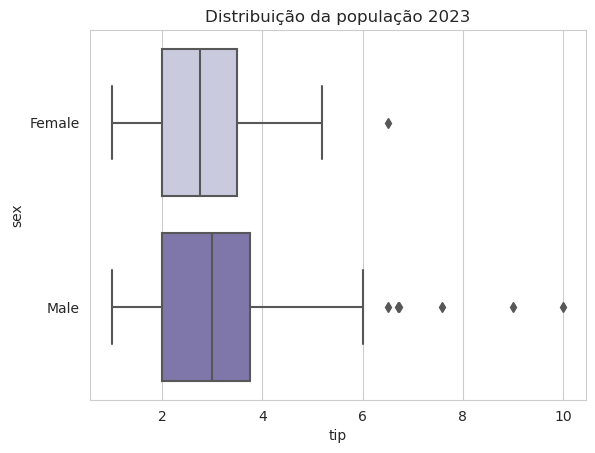

In [29]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=dados["tip"],y=dados["sex"], palette='Purples')
  grafico.set(title='Distribuição da população 2023', xlabel='tip',ylabel="sex");

Analisamos que tanto o sexo masculino e o feminino possuem valores médios de gorjetas semelhantes entre 2 e 4, no entanto, homens possuem maior variação de valores, tento outiliers de 6 a 10 de gorjetas, enquanto mulheres possuem uma variação menor, tendo um outlier identificado na gorjeta valor aproximado de 6,2

* **O fato de a pessoa ser fumante (smoker) influencia no valor da gorjeta?**

C:\Users\micae\AppData\Local\Temp\ipykernel_22564\2595172946.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_sum_by_smoker = dados.groupby('smoker')['tip'].mean()


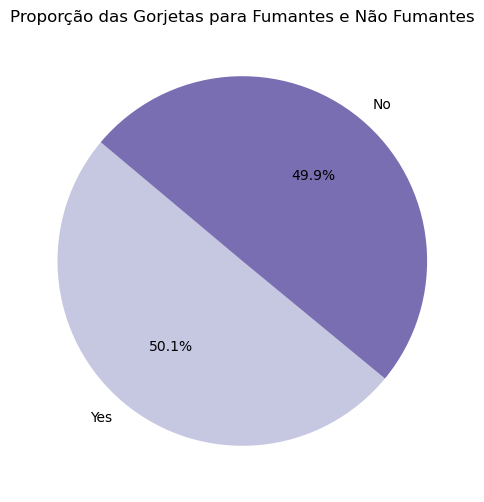

In [45]:
# Agrupamento das gorjetas por fumantes e não fumantes
tip_sum_by_smoker = dados.groupby('smoker')['tip'].mean()

# Paleta de cores (Purples)
palette = sns.color_palette("Purples", len(tip_sum_by_smoker))

# Gráfico de pizza com a paleta de cores
plt.figure(figsize=(8, 6))
plt.pie(
    tip_sum_by_smoker, 
    labels=tip_sum_by_smoker.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=palette
)
plt.title('Proporção das Gorjetas para Fumantes e Não Fumantes')
plt.show()


Primeiramente tentei plotar um gráfico com a quantidade total do valor de gorjeta por fumante ou não fumante, mas percebi que não traria a análise desejada pela distribuição de não fumantes ser maior que fumantes e por consequência o valor da gorjeta seria maior, então foi mais útil aplicar a média dos valores, e chegou a conclusão que clientes fumantes deixam em média mais gorjeta, mas por serem uma margem de diferença muito pequena, não se pode afirmar que esse comportamento influência o aumento nas gorjetas.

* **O valor da gorjeta varia de acordo com o dia da semana (day)?**

C:\Users\micae\AppData\Local\Temp\ipykernel_22564\597151785.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day', y='tip', data=dados, estimator='sum', ci=None,palette='Purples')


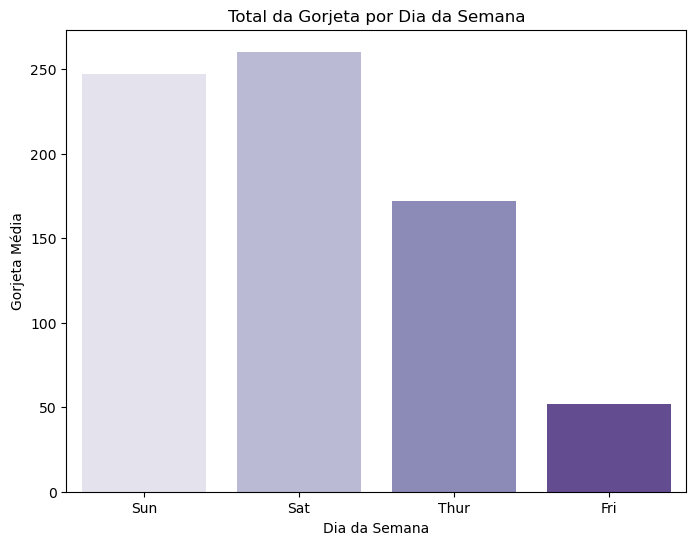

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='tip', data=dados, estimator='sum', ci=None,palette='Purples')

plt.title('Total da Gorjeta por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Gorjeta Média')
plt.show()

A cima vemos que há um variação entre os valores da gorjeta durante os dias da semana, sendo o menor na sexta, tendo um aumento considerado na quinta e os maiores valores ao final de semana (sábado e domingo), pois provavelmente há maior circulação de pessoas por conta de folga de trabalho/estudos.

* **Há diferença no valor das gorjetas em refeições feitas no almoço ou jantar (time)?**

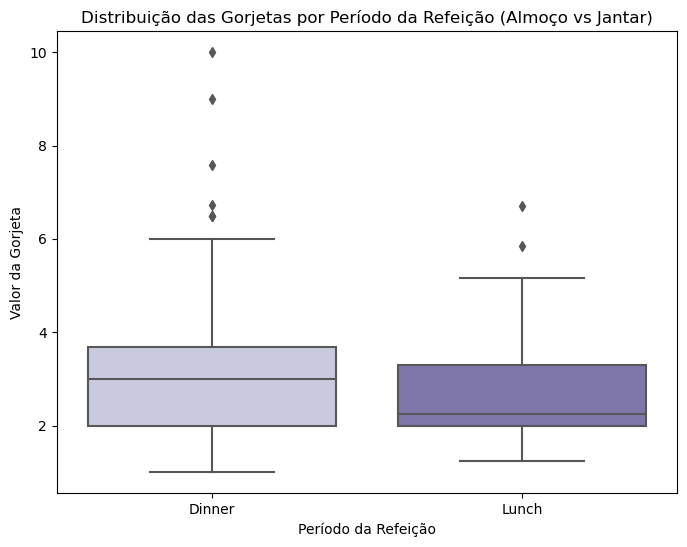

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='time', y='tip', data=dados, palette='Purples')

plt.title('Distribuição das Gorjetas por Período da Refeição (Almoço vs Jantar)')
plt.xlabel('Período da Refeição')
plt.ylabel('Valor da Gorjeta')
plt.show()

Vemos que no almoço e na jantar os valores médios de gorjeta são muito semelhantes, no entanto, a janta possui uma variação maior de gorjeta, chegando a valores maiores do que o almoço, isso pode ser influenciado, por exemplo, pela movimentação de pessoas em determinados horários do dia.

* **O tamanho do grupo (size) influencia o valor total da conta e/ou da gorjeta?**

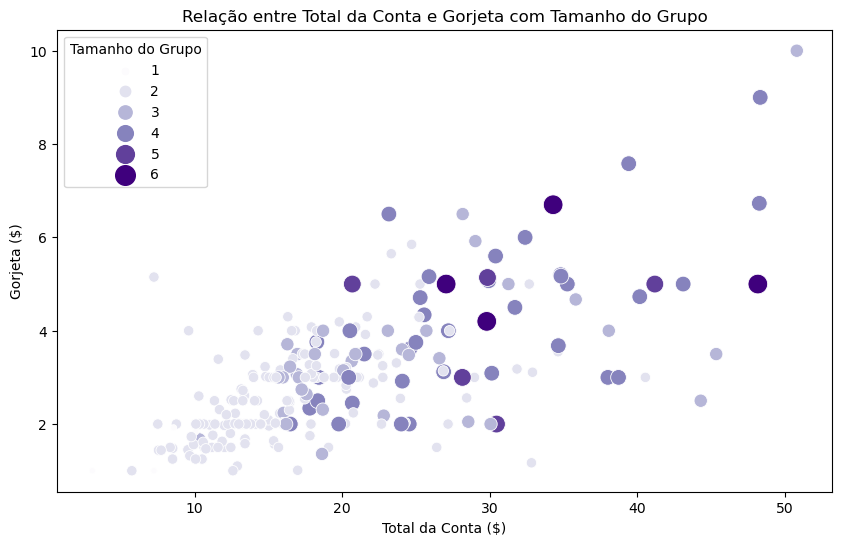

In [38]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='total_bill', y='tip', hue='size', size='size', data=dados, sizes=(20, 200), palette='Purples', legend='brief')

plt.title('Relação entre Total da Conta e Gorjeta com Tamanho do Grupo')
plt.xlabel('Total da Conta ($)')
plt.ylabel('Gorjeta ($)')
plt.legend(title='Tamanho do Grupo')
plt.show()

Observamos que os dados estão bem destribuídos ao longo dos grupos e seus valores de conta e gorjetas, mas observa-se que em uma boa parte, grupos maiores tendem a ter um total de conta maior que 30, mas isso raramente se reflete a maior valor de gorjeta, também observa-se que a maioria de 1 pessoa ou grupo de 2 está concentrado em total de conta antes de 30, sendo posterior a isso pontos fora da curva, mas não dar para ter certeza. Nota-se que grupos de 6 pessoas são bem raros e o mais comum são poucas pessoas.

## 3. Insights

* **Hipótese 1: Existe uma correlação positiva entre o valor total da conta (total_bill) e o valor da gorjeta (tip). Ou seja, quanto maior o valor da conta, maior tende a ser a gorjeta**.

    * Observa-se que os valores de conta e gorjeta estão bem distribuídos, mas com a inclinação da reta, percebe-se que os maiores valores de gorjeta estão onde há maior valor da conta, entre 30 e 50, no entanto, há uma concentração maior de pessoas nos valores abaixo disso, o que pode resultar em uma soma maior de gorjetas recebidas.

* **Hipótese 2: Clientes do sexo feminino (sex) tendem a dar gorjetas de valores diferentes em comparação aos clientes do sexo masculino.**
    * Analisamos que tanto o sexo masculino e o feminino possuem valores médios de gorjetas semelhantes entre 2 e 4, no entanto, homens possuem maior variação de valores, tento outiliers de 6 a 10 de gorjetas, enquanto mulheres possuem uma variação menor, tendo um outlier identificado na gorjeta valor aproximado de 6,2

* **Hipótese 3: Clientes que são fumantes (smoker) deixam gorjetas menores em comparação aos não-fumantes.**
    * Primeiramente tentei plotar um gráfico com a quantidade total do valor de gorjeta por fumante ou não fumante, mas percebi que não traria a análise desejada pela distribuição de não fumantes ser maior que fumantes e por consequência o valor da gorjeta seria maior, então foi mais útil aplicar a média dos valores, e chegou a conclusão que clientes fumantes deixam em média mais gorjeta, mas por serem uma margem de diferença muito pequena, não se pode afirmar que esse comportamento influência o aumento nas gorjetas.

* **Hipótese 4: O valor da gorjeta é maior nos finais de semana (sábado e domingo) do que durante os dias da semana.**
    * vemos que há um variação entre os valores da gorjeta durante os dias da semana, sendo o menor na sexta, tendo um aumento considerado na quinta e os maiores valores ao final de semana (sábado e domingo), pois provavelmente há maior circulação de pessoas por conta de folga de trabalho/estudos.

* **Hipótese 5: O período da refeição (time) influencia o valor da gorjeta, sendo maior no jantar do que no almoço.**
    * Vemos que no almoço e na jantar os valores médios de gorjeta são muito semelhantes, no entanto, a janta possui uma variação maior de gorjeta, chegando a valores maiores do que o almoço, isso pode ser influenciado, por exemplo, pela movimentação de pessoas em determinados horários do dia.
* **Hipótese 6: Grupos maiores (size) resultam em contas maiores (total_bill), mas isso não significa necessariamente uma gorjeta proporcionalmente maior**
    * Observamos que os dados estão bem destribuídos ao longo dos grupos e seus valores de conta e gorjetas, mas observa-se que em uma boa parte, grupos maiores tendem a ter um total de conta maior que 30, mas isso raramente se reflete a maior valor de gorjeta, também observa-se que a maioria de 1 pessoa ou grupo de 2 está concentrado em total de conta antes de 30, sendo posterior a isso pontos fora da curva, mas não dar para ter certeza. Nota-se que grupos de 6 pessoas são bem raros e o mais comum são poucas pessoas.